In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
os_loc = os.getcwd()

In [3]:
bike = pd.read_csv(os_loc + '/bike_data/train.csv', encoding = 'cp949')

In [4]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Feature selection

## Removing Features with low variance

### VarianceThreshold : 분산이 임계값을 넘지 못하는 feature를 제거한다.

In [6]:
bike.iloc[:,2:4]

,holiday,workingday
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
10881,0,1
10882,0,1
10883,0,1
10884,0,1


In [7]:
from sklearn.feature_selection import VarianceThreshold

X = bike.iloc[:,2:4]
sel = VarianceThreshold(threshold = (.8 * ( 1- .8)))
# threshold : 이 임계값보다 낮은 분산을 가진 feature를 제거한다. 기본값은 모든 feature가 0이 아닌 분산을 가지게 한다. 
# threshold = (.8 * ( 1- .8)) -> 데이터의 분포가 한쪽으로 치우쳐진 정도가 80%이상인 값을 제거.
sel.fit_transform(X)
# holiday 컬럼 제거

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [8]:
round(bike['holiday'].value_counts() / sum(bike['holiday'].value_counts().values) * 100,2)

0    97.14
1     2.86
Name: holiday, dtype: float64

In [9]:
bike.iloc[:,1:5]

,season,holiday,workingday,weather
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
10881,4,0,1,1
10882,4,0,1,1
10883,4,0,1,1
10884,4,0,1,1


In [10]:
from sklearn.feature_selection import VarianceThreshold

X = bike.iloc[:,1:5]
sel = VarianceThreshold(threshold = (.8 * ( 1- .8)))
# threshold : 이 임계값보다 낮은 분산을 가진 feature를 제거한다. 기본값은 모든 feature가 0이 아닌 분산을 가지게 한다. 
sel.fit_transform(X)


array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       ...,
       [4, 1, 1],
       [4, 1, 1],
       [4, 1, 1]], dtype=int64)

In [11]:
for i in X.columns:
    print(round(bike[i].value_counts() / sum(bike[i].value_counts().values) * 100,2), end = "\n")

4    25.11
3    25.11
2    25.11
1    24.67
Name: season, dtype: float64
0    97.14
1     2.86
Name: holiday, dtype: float64
1    68.09
0    31.91
Name: workingday, dtype: float64
1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64


In [12]:
from sklearn.feature_selection import VarianceThreshold

X = bike.iloc[:,1:5]
sel = VarianceThreshold(threshold = (.6 * ( 1- .6)))
# threshold : 이 임계값보다 낮은 분산을 가진 feature를 제거한다. 기본값은 모든 feature가 0이 아닌 분산을 가지게 한다. 
sel.fit_transform(X)


array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [4, 1],
       [4, 1],
       [4, 1]], dtype=int64)

In [13]:
np.var(bike.workingday)

0.21728440883623767

In [14]:
.6 * .4

0.24

#### 카테고리 특성에 대해 원핫인코딩을 진행한 후 사용하기 좋아 보인다.

### strftime() : 날짜 형식 변환 메서드
### ◆ %d : 0을 채운 10진수 표기로 날짜를 표시
### ◆ %m : 0을 채운 10진수 표기로 월을 표시
### ◆ %y : 0을 채운 10진수 표기로 2자리 년도
### ◆ %Y : 0을 채운 10진수 표기로 4자리 년도
### ◆ %H : 0을 채운 10진수 표기로 시간 (24시간 표기)
### ◆ %I : 0을 채운 10진수 표기로 시간 (12시간 표기)
### ◆ %M : 0을 채운 10진수 표기로 분
### ◆ %S : 0을 채운 10진수 표기로 초

In [15]:
bike['datetime'] = pd.to_datetime(bike['datetime'])

In [16]:
bike['year'] = bike['datetime'].dt.strftime('%Y')
bike['month'] = bike['datetime'].dt.strftime('%m')
bike['day'] = bike['datetime'].dt.strftime('%d')
bike['hour'] = bike['datetime'].dt.strftime('%H')

In [17]:
bike.drop(['datetime'], axis = 1, inplace=True)

In [18]:
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,01,01,00
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,01,01,01
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,01,01,02
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,01,01,03
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,01,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


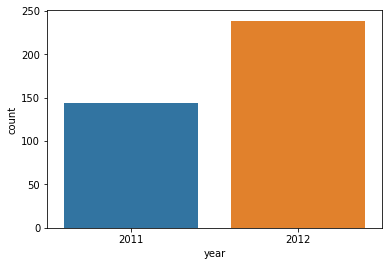

In [19]:
sns.barplot(x ='year', y = 'count', data = bike.groupby(bike['year'])['count'].mean().reset_index())
plt.show()

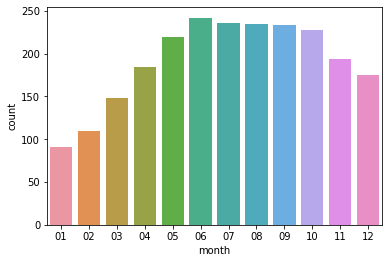

In [20]:
sns.barplot(x ='month', y = 'count', data = bike.groupby(bike['month'])['count'].mean().reset_index())
plt.show()

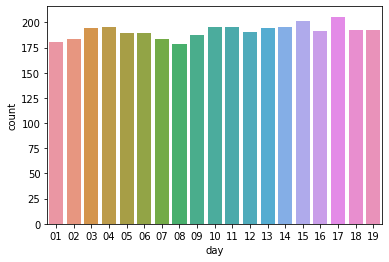

In [21]:
sns.barplot(x ='day', y = 'count', data = bike.groupby(bike['day'])['count'].mean().reset_index())
plt.show()

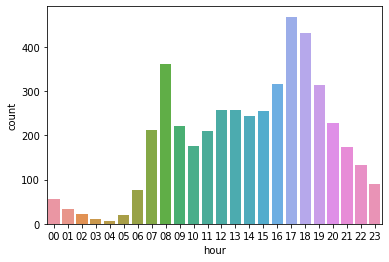

In [22]:
sns.barplot(x ='hour', y = 'count', data = bike.groupby(bike['hour'])['count'].mean().reset_index())
plt.show()

In [23]:
bike_dum = pd.get_dummies(bike, columns = ['season', 'holiday', 'workingday' , 'weather', 'year', 'month', 'day', 'hour'])

In [24]:
bike_dum

,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0000,3,13,16,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0000,8,32,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0000,5,27,32,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0000,3,10,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0000,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329,336,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10882,14.76,17.425,57,15.0013,10,231,241,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10883,13.94,15.910,61,15.0013,4,164,168,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10884,13.94,17.425,61,6.0032,12,117,129,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Univariate feature selection
### SelectKbest : target 변수와 그외 다른 변수들 사이의 상관관계를 구하여 상관관계가 높은 k개의 변수를 선택하는 방법이다
### <a href = "https://blog.naver.com/PostView.nhn?blogId=now2go&logNo=222119231886&parentCategoryNo=&categoryNo=21&viewDate=&isShowPopularPosts=true&from=search">참고</a>

In [25]:
X = bike_dum.drop(['count'], axis = 1)
Y = bike_dum['count']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [27]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_Kbest = SelectKBest(chi2, k = 20).fit_transform(X_train, y_train)
# score_func : 상관관계의 p-value를 구할 방법을 설정하는 파라미터
#  분류방식에 chi2, f_classif, mutual_info_classif 방법이 있다.
#  회귀방식에 f_regression, mutual_info_regression 방법이 있다.
# k : 선택될 변수의 갯수를 설정하는 파라미터이다.
X_Kbest.shape

(7620, 20)

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func = chi2, k = 20)
X_Kbest = selector.fit_transform(X_train, y_train)

In [29]:
all_feats = X_train.columns

selected_feat = selector.get_support()

selected_feat_names = all_feats[selected_feat]

print("Select Columns : ", selected_feat_names)

Select Columns :  Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'month_08', 'month_09', 'month_10', 'hour_02', 'hour_03', 'hour_04',
       'hour_05', 'hour_08', 'hour_13', 'hour_14', 'hour_16', 'hour_17',
       'hour_18', 'hour_19'],
      dtype='object')


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func = f_classif, k = 20)
X_Kbest = selector.fit_transform(X_train, y_train)

In [31]:
all_feats = X_train.columns

selected_feat = selector.get_support()

selected_feat_names = all_feats[selected_feat]

print("Select Columns : ", selected_feat_names)

Select Columns :  Index(['temp', 'atemp', 'humidity', 'casual', 'registered', 'season_1',
       'season_3', 'year_2011', 'year_2012', 'month_08', 'month_09',
       'month_10', 'hour_03', 'hour_04', 'hour_05', 'hour_08', 'hour_16',
       'hour_17', 'hour_18', 'hour_19'],
      dtype='object')


### SelectPercentile : 지정된 비율만큼 feature를 선택한다.

In [32]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(percentile = 30)
#score_func : SelectKBest와 같이 상관관계의 p-value를 구할 방법을 설정하는 파라미터이다.
#percentile : 선택될 feature의 비율을 설정한다.
X_Perc = selector.fit_transform(X_train, y_train)

In [33]:
print(X_train.shape)
print(X_Perc.shape)

(7620, 75)
(7620, 23)


### SelectFpr : FPR(False Positive Rate)를 기반으로 feature를 선택한다. 
#### ※ FPR : 1종오류로 귀무가설이 실제로 참이지만, 이에 불구하고 귀무가설을 기각하는 오류
### SelectFdr : FDR(False Discovery Rate)를 기반으로 feature를 선택한다.
#### ※ FDR : 유의하다고 판단한 것 중에 실제로는 유의하지 않은 것의 비율( FDR = False Positive / Total Positive) <a href = "http://www.incodom.kr/False_discovery_rate">참고 1</a>  <a href="https://3months.tistory.com/262">참고2</a>
### selectFwe : FWER(Family-Wise Error Rate)를 기반으로 feature를 선택한다.
#### ※ FWER : 여러번의 가설검정을 실시할때 적어도 하나의 가설에서 1종오류가 발생할 가능성 <a href = "https://be-favorite.tistory.com/25">참고</a>

### GenericUnivariateSelect : 단변량 변수를 선택할 수 있는 분류기

## Recursive feature elimination
### <a href = "https://process-mining.tistory.com/138"> 참고 </a>
### RFE : 재귀적 특성 제거 방법으로 모든 feature들로부터 feature를 하나하나 제거하면서 원하는 개수의 feature가 남을 때까지 이를 반복한다. (모델에 모든 feature를 학습하고 모델의 feature importance를 통해 가장 낮은 feature를 제거하는 작업을 원하는 변수의 갯수만큼 반복하여 feature를 선정한다.
### RFECV : RFECV는 Recursive feature elimination with Cross Validation으로 RFE방식과 동일한 방법으로 진행하지만 정해진 갯수를 선택하지않고 각 feature마다 K-fold vaildation과 같은 cross validation을 진행하여 각기 다른 성능을 도출한다.

In [34]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=20, step=1)
# estimator : 지도학습 모델
# n_features_to_select : 선택할 feature의 갯수
# step : 반복할 때 마다 제거될 feature의 개수, 0~1사이의 값이 입력되면 반복할 때마다 제거될 feature의 갯수를 백분율로 선정한다.
# verbose : 출력을 제어한다. (무엇을 의미하는지 이해가 되진 않음.)
# importance_getter : default값은 'auto'로 'auto'일때 'coef_'나 'feature_importances_'로 특성의 중요도를 구할 수 있다.
selector = selector.fit(X_train, y_train)
selector.feature_names_in_

array(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'year_2011', 'year_2012',
       'month_01', 'month_02', 'month_03', 'month_04', 'month_05',
       'month_06', 'month_07', 'month_08', 'month_09', 'month_10',
       'month_11', 'month_12', 'day_01', 'day_02', 'day_03', 'day_04',
       'day_05', 'day_06', 'day_07', 'day_08', 'day_09', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'hour_00', 'hour_01', 'hour_02',
       'hour_03', 'hour_04', 'hour_05', 'hour_06', 'hour_07', 'hour_08',
       'hour_09', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23'], dtype=object)

In [35]:
selector.ranking_

array([ 2, 19, 15, 23,  1,  1,  1,  7,  1,  1, 24, 33,  1,  1, 16, 18,  9,
       34,  3,  1, 32, 20,  1, 22, 35,  8,  1,  1,  6,  1, 43, 45, 21, 11,
       12, 53, 55,  1, 29,  1, 13, 14, 44, 46, 38, 39,  1, 26,  1, 47, 10,
       41, 17,  4,  5,  1,  1, 36, 37, 25, 42, 31, 27,  1, 28, 30, 40,  1,
       48, 49, 50, 51, 52, 54, 56])

In [36]:
selector.get_feature_names_out(input_features=None)

array(['casual', 'registered', 'season_1', 'season_3', 'season_4',
       'workingday_0', 'workingday_1', 'year_2012', 'month_03',
       'month_07', 'month_08', 'month_10', 'day_06', 'day_08', 'day_15',
       'day_17', 'hour_04', 'hour_05', 'hour_12', 'hour_16'], dtype=object)

## Feature selection using SelectFromModel

### L1-based feature selection : L1규제가 적용된 선형모델로 대부분의 추정계수가 0으로 추정된다. 여기서 SelectFromeModel을 이용하여 0이 아닌 계수를 추출할 수 있다. 유용한 모델로 회귀분석, 로지스틱 회귀분석, 라쏘회귀가 있다.

In [37]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
#prefit : defalut는 False로 True이면 transform을 직접 호출하고, cross_val_score, GridSearchCV 및 Estimator를 복제하는 유틸리티를 사용할 수 없다.
X_new = model.transform(X_train)
X_new.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(7620, 8)

In [38]:
X_new

array([[ 17.22 ,  21.21 ,  50.   , ..., 415.   ,   0.   ,   1.   ],
       [ 16.4  ,  20.455,  76.   , ..., 169.   ,   0.   ,   1.   ],
       [ 21.32 ,  25.   ,  83.   , ...,   9.   ,   0.   ,   1.   ],
       ...,
       [ 33.62 ,  38.635,  52.   , ..., 258.   ,   0.   ,   0.   ],
       [ 36.9  ,  40.91 ,  35.   , ..., 137.   ,   0.   ,   1.   ],
       [ 10.66 ,  12.88 ,  81.   , ..., 162.   ,   0.   ,   1.   ]])

In [39]:
from sklearn import linear_model 
from sklearn.feature_selection import SelectFromModel

clf = linear_model.Lasso(alpha = 0.05)
model = SelectFromModel(clf)
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.05))

In [40]:
model.n_features_in_

75

In [41]:
print(model.estimator_.coef_)

[ 0.          0.         -0.          0.          0.99997997  1.00000111
 -0.          0.          0.         -0.         -0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.          0.          0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.        ]


In [43]:
model.get_feature_names_out(input_features=None)

array(['casual', 'registered'], dtype=object)

In [44]:
X = X.drop(['casual', 'registered'],axis = 1)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [46]:
from sklearn import linear_model 
from sklearn.feature_selection import SelectFromModel

clf = linear_model.Lasso(alpha = 0.5)
model = SelectFromModel(clf)
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.5))

In [47]:
model.n_features_in_

73

In [48]:
print(model.estimator_.coef_)

[ 3.17795300e+00  2.88027218e+00 -1.05677193e+00 -3.51444416e-01
 -2.65911947e+01  0.00000000e+00 -1.02685348e+01  3.35682336e+01
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  8.24875508e+00  0.00000000e+00 -3.94304990e+01 -0.00000000e+00
 -8.31089011e+01  2.43488129e-14 -9.71425618e+00 -0.00000000e+00
  0.00000000e+00 -6.24821655e-01  1.57567906e+01  7.54475371e-01
 -6.67810807e+00 -0.00000000e+00  2.67378222e+01  1.23626986e+00
  0.00000000e+00 -0.00000000e+00 -5.87151950e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.21854628e-01  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.70382238e+00 -0.00000000e+00
 -0.00000000e+00 -1.16164496e+02 -1.34294869e+02 -1.47901270e+02
 -1.56850404e+02 -1.57484963e+02 -1.38650706e+02 -8.21969292e+01
  2.51665716e+01  1.71357174e+02  2.28075984e+01 -1.06759349e+01
 -0.00000000e+00  2.28115

In [49]:
model.get_feature_names_out(input_features=None)

array(['temp', 'atemp', 'humidity', 'windspeed', 'season_1', 'season_3',
       'season_4', 'weather_1', 'weather_3', 'year_2011', 'month_01',
       'month_04', 'month_05', 'month_06', 'month_07', 'month_09',
       'month_10', 'day_01', 'day_11', 'day_17', 'hour_00', 'hour_01',
       'hour_02', 'hour_03', 'hour_04', 'hour_05', 'hour_06', 'hour_07',
       'hour_08', 'hour_09', 'hour_10', 'hour_12', 'hour_13', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23'], dtype=object)

#### alpha 0.05할때는 대부분 특성 중요도가 나왔는데 0.5로 alpha값을 높이니 day부분은 거의 전멸이다. 
#### day도 제거해도 될듯하다.

In [50]:
bike_dum_2 = pd.get_dummies(bike, columns = ['season', 'holiday', 'workingday' , 'weather', 'year', 'month', 'hour'])

In [57]:
X = bike_dum_2.drop(['day', 'casual', 'registered','count'], axis = 1)
Y = bike_dum_2['count']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

### SVC와 로지스틱회귀는 C값이 낮을수록 적은 갯수의 feature가 선택되고 Lasso의 경우에는 alpha값이 낮을수록 적은 갯수의 feature가 선택된다.

### Tree-based feature selection : 트리를 기반으로 feature를 선택한다.

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators = 100)
clf = clf.fit(X_train, y_train)

In [60]:
model = SelectFromModel(clf)
model.fit(X_train, y_train)

SelectFromModel(estimator=ExtraTreesClassifier())

In [61]:
model.estimator_.feature_importances_

array([1.36976370e-01, 1.37782831e-01, 1.57343443e-01, 1.53442543e-01,
       4.57245812e-03, 1.00559579e-02, 7.99619855e-03, 8.91077974e-03,
       5.10759680e-03, 5.15577770e-03, 1.37481142e-02, 1.34499515e-02,
       2.80894512e-02, 2.70469117e-02, 1.18235391e-02, 7.42300712e-05,
       1.09333674e-02, 1.09368786e-02, 5.79726619e-03, 6.53760256e-03,
       6.58133776e-03, 9.31324729e-03, 1.02587649e-02, 8.92096149e-03,
       9.21341778e-03, 9.24509696e-03, 1.00155131e-02, 9.05560439e-03,
       9.18506445e-03, 8.86770915e-03, 3.10596233e-03, 3.17424952e-03,
       3.22491831e-03, 3.63793155e-03, 4.80906350e-03, 3.06650276e-03,
       4.40747372e-03, 6.09643472e-03, 6.24601043e-03, 6.70766287e-03,
       7.30745396e-03, 8.86938780e-03, 8.96321474e-03, 8.64498423e-03,
       8.71769781e-03, 8.90088877e-03, 8.18690130e-03, 7.05744595e-03,
       7.41232127e-03, 7.95673511e-03, 8.35336564e-03, 8.01837545e-03,
       6.30299395e-03, 4.39403824e-03])

In [62]:
model.get_feature_names_out(input_features=None)

array(['temp', 'atemp', 'humidity', 'windspeed', 'weather_1', 'weather_2'],
      dtype=object)

In [63]:
X_new = model.transform(X_train)
X_new.shape

(7620, 6)

## Sequential Feature Selection

### Forward-SFS(전진선택법) : feature를 아무것도 선택하지 않은 상태에서 feature를 하나씩 선택하여 모델의 성능이 가장 좋은 feature를 선택한다.
### Backward-SFS(후진선택법) : Forward-SFS와 반대로 모든 feature를 선택후 feature를 하나씩 제거하여 모델의 성능이 가장 좋은 feature를 선택한다.


In [64]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

variable = SequentialFeatureSelector(LinearRegression(), 
                                     n_features_to_select = 8, 
                                     direction = 'forward').fit(X_train, y_train)
#estimator : 모델
#n_features_to_select : 선택할 feature의 개수. default = "None" -> feature의 절반이 선택된다.
#direction : 'forward'와 'backward'가 있다. default = 'forward'
#scoring : 모델 평가 점수 산정 방식 선택. deafult는 모델의 기본 점수 산정방식을 사용한다.
#cv : 교차 검증에 대해 결정. default는 5-fold cross validation 

In [65]:
variable.n_features_to_select_

8

In [66]:
variable.get_feature_names_out(input_features=None)

array(['temp', 'humidity', 'season_4', 'year_2011', 'hour_08', 'hour_17',
       'hour_18', 'hour_19'], dtype=object)

In [67]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

variable = SequentialFeatureSelector(LinearRegression(), 
                                     n_features_to_select = 8, 
                                     direction = 'backward').fit(X_train, y_train)


In [68]:
variable.get_feature_names_out(input_features=None)

array(['temp', 'year_2012', 'hour_08', 'hour_12', 'hour_16', 'hour_17',
       'hour_18', 'hour_19'], dtype=object)